# TELECOM CHURN RATE

## • DOMAIN: Telecom

## • CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. Analysing all relevant customer data and develop focused customer retention programs.

### 1. Import and warehouse data:

### Import relevant libraries:

In [1]:
#Standard libraries for data analysis and data visualization:    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

#sklearn modules for Model Selection:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:

from scipy.stats import zscore    
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,log_loss, classification_report, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold

import random
import os
import warnings
warnings.filterwarnings("ignore")
from tkinter import *
import tkinter as tk
from tkinter import ttk
import pickle

### Set up the current working directory:

In [2]:
os.chdir('C:/Users/RajSri/Documents/PGP AIML GL Notebooks/16. Ensemble Techniques  - Project/')

### Import the dataset:

In [3]:
tc_churn = pd.read_csv('TelcomCustomer-Churn.csv')

### Evaluate data structure:

In [4]:
tc_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Information on the dataframe incluting datatypes, count etc

tc_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
# Checking Null Values

tc_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
tc_churn.shape

(7043, 21)

In [8]:
tc_churn.size

147903

#### Insight - We have total of 7043 rows and 21 columns with different datatypes. Size of the dataframe is 147903. Few categorical data needs to converted. There isnt any "Null" values, but few missing values. 
#### Total Charges features needs to be modified into float datatype. 

In [9]:
#Unique values in each categorical variable: (To get deeper understanding of the features)

#tc_churn["PaymentMethod"].nunique()
tc_churn["PaymentMethod"].unique()
#tc_churn["Contract"].nunique()
tc_churn["Contract"].unique()

#Looping through columns to get the unique values per feature/column.

for i in tc_churn.columns:
    print(f"Uniques {i}'s count:{tc_churn[i].nunique()}")
    print(f"{tc_churn[i].unique()}\n")

Uniques customerID's count:7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Uniques gender's count:2
['Female' 'Male']

Uniques SeniorCitizen's count:2
[0 1]

Uniques Partner's count:2
['Yes' 'No']

Uniques Dependents's count:2
['No' 'Yes']

Uniques tenure's count:73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Uniques PhoneService's count:2
['No' 'Yes']

Uniques MultipleLines's count:3
['No phone service' 'No' 'Yes']

Uniques InternetService's count:3
['DSL' 'Fiber optic' 'No']

Uniques OnlineSecurity's count:3
['No' 'Yes' 'No internet service']

Uniques OnlineBackup's count:3
['Yes' 'No' 'No internet service']

Uniques DeviceProtection's count:3
['No' 'Yes' 'No internet service']

Uniques TechSupport's count:3
['No' 'Yes' 'No internet service']

Uniques StreamingTV'

### Check target variable distribution:

In [10]:
# To see if the dataset upholds any class imbalance issues. 

tc_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

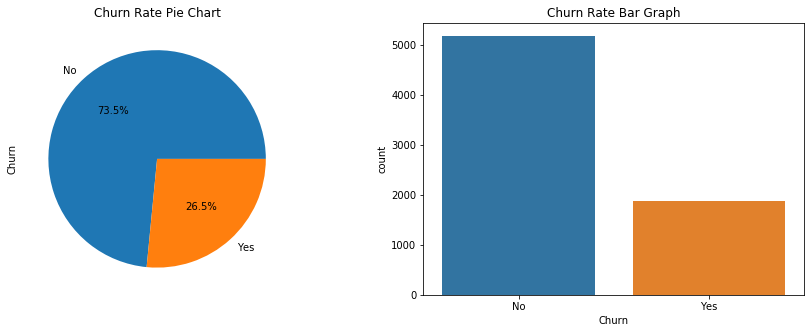

In [11]:
f,axes=plt.subplots(1,2,figsize=(15,5))
tc_churn['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Churn',data=tc_churn,ax=axes[1])
axes[0].set_title('Churn Rate Pie Chart')
axes[1].set_title('Churn Rate Bar Graph')
plt.show()

#### Insight: The data set is imbalanced with a high proportion of active customers compared to their churned counterparts.

### 2. Data Cleansing

In [12]:
# Converting "Total Charges" into float datatype.

tc_churn['TotalCharges'] = pd.to_numeric(tc_churn['TotalCharges'],errors='coerce')
tc_churn['TotalCharges'] = tc_churn['TotalCharges'].astype("float")

# Dropping rows with Missing Values
tc_churn = tc_churn.dropna()

In [13]:
#Revalidate dataset

tc_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [14]:
# Counting the number of missing values

tc_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Insight: Dataframe is cleaned without any Null values

### 3. Statiscal Data Analysis and Data Visualization:

In [15]:
# 5 Point Summary

tc_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


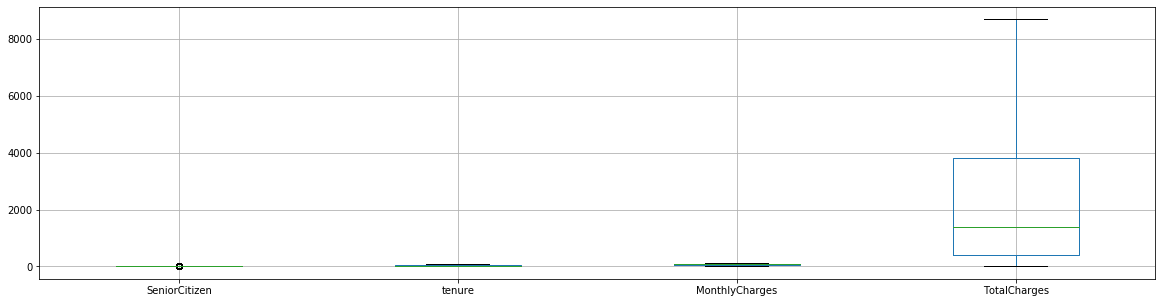

In [16]:
tc_churn.boxplot(figsize=(20,5))

#### Insights: Senior Citizen has only two variables. Total Charges is left-skewed. Tenure is slightly left skewed and Montly Charges  is slightly right skewed.

### Univariate Analysis:

#### Distribution and outlier analysis of numerical variables:

#### Senior Citizen:

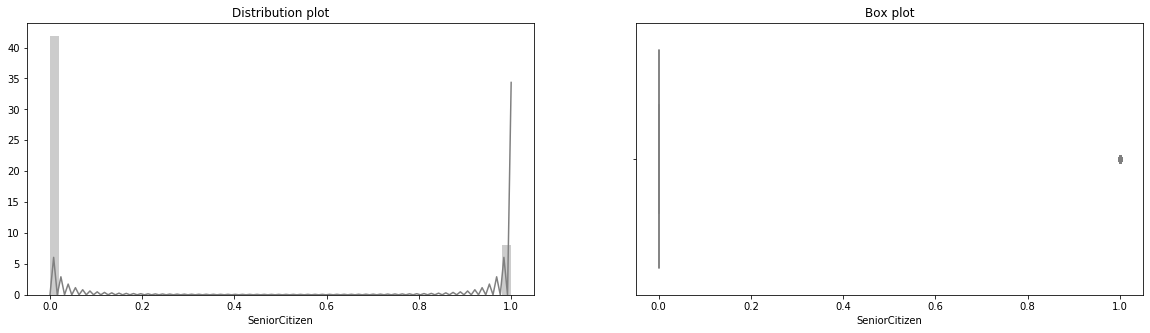

 Total Number of outliers in SeniorCitizen: 1142


In [17]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'SeniorCitizen', data=tc_churn,  orient='h' , ax=axes[1], color='lightgrey')
sns.distplot(tc_churn['SeniorCitizen'],  ax=axes[0], color='grey')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

#checking count of outliers.
q25,q75=np.percentile(tc_churn['SeniorCitizen'],25),np.percentile(tc_churn['SeniorCitizen'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in tc_churn['SeniorCitizen'] if i < lower or i > upper]
print('{} Total Number of outliers in SeniorCitizen: {}'.format('\033[1m',len(Outliers)))

#### Tenure:

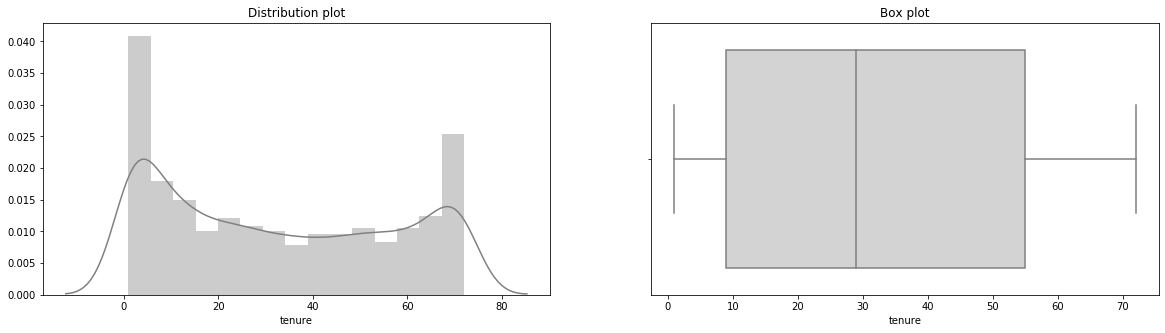

 Total Number of outliers in tenure: 0


In [18]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'tenure', data=tc_churn,  orient='h' , ax=axes[1], color='lightgrey')
sns.distplot(tc_churn['tenure'],  ax=axes[0], color='grey')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

#checking count of outliers.
q25,q75=np.percentile(tc_churn['tenure'],25),np.percentile(tc_churn['tenure'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in tc_churn['tenure'] if i < lower or i > upper]
print('{} Total Number of outliers in tenure: {}'.format('\033[1m',len(Outliers)))

#### MonthlyCharges:

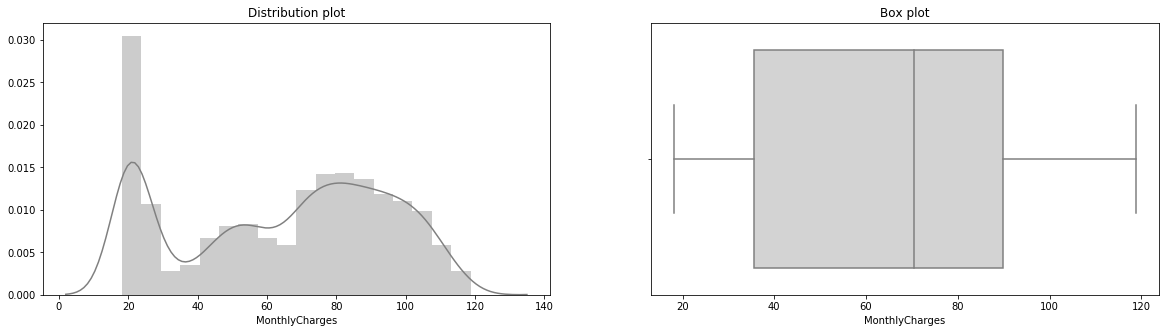

 Total Number of outliers in MonthlyCharges: 0


In [19]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'MonthlyCharges', data=tc_churn,  orient='h' , ax=axes[1], color='lightgrey')
sns.distplot(tc_churn['MonthlyCharges'],  ax=axes[0], color='grey')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

#checking count of outliers.
q25,q75=np.percentile(tc_churn['MonthlyCharges'],25),np.percentile(tc_churn['MonthlyCharges'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in tc_churn['MonthlyCharges'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyCharges: {}'.format('\033[1m',len(Outliers)))

#### TotalCharges:

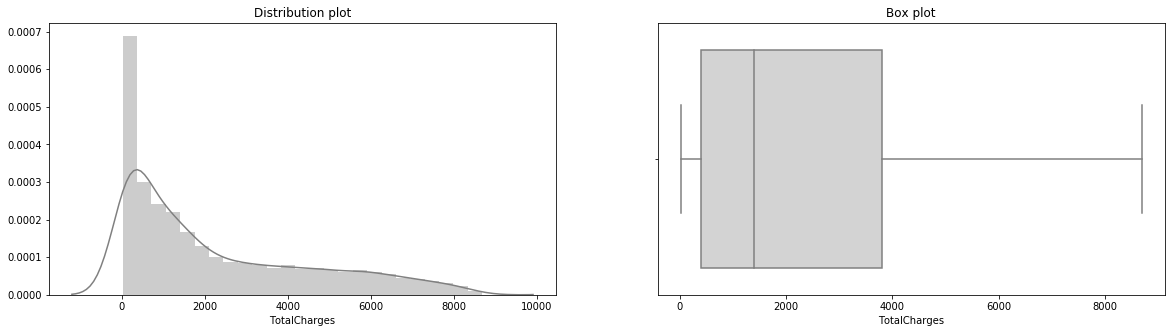

 Total Number of outliers in TotalCharges: 0


In [20]:
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x = 'TotalCharges', data=tc_churn,  orient='h' , ax=axes[1], color='lightgrey')
sns.distplot(tc_churn['TotalCharges'],  ax=axes[0], color='grey')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

#checking count of outliers.
q25,q75=np.percentile(tc_churn['TotalCharges'],25),np.percentile(tc_churn['TotalCharges'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in tc_churn['TotalCharges'] if i < lower or i > upper]
print('{} Total Number of outliers in TotalCharges: {}'.format('\033[1m',len(Outliers)))

#### Insights: No outliers in numerical features detected with the IQR method — no adjustments made. Total Charges is left-skewed. Tenure is slightly left skewed and Montly Charges is slightly right skewed.

### Bivariate Analysis

#### Target variable (Churn) Vs Numerical Variables ('tenure', 'MonthlyCharges', 'TotalCharges'):

In [21]:
# Create function to generate box plot

plots = {1:[111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224] , 5:[231,232,233,234,235], 6:[231,232,233,234,235,236]}

def boxplot (x,y,tc_churn):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure (figsize = (7*columns,7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data= tc_churn, palette = 'Blues', linewidth=1)
        ax.set_title(j)
        
    return plt.show()

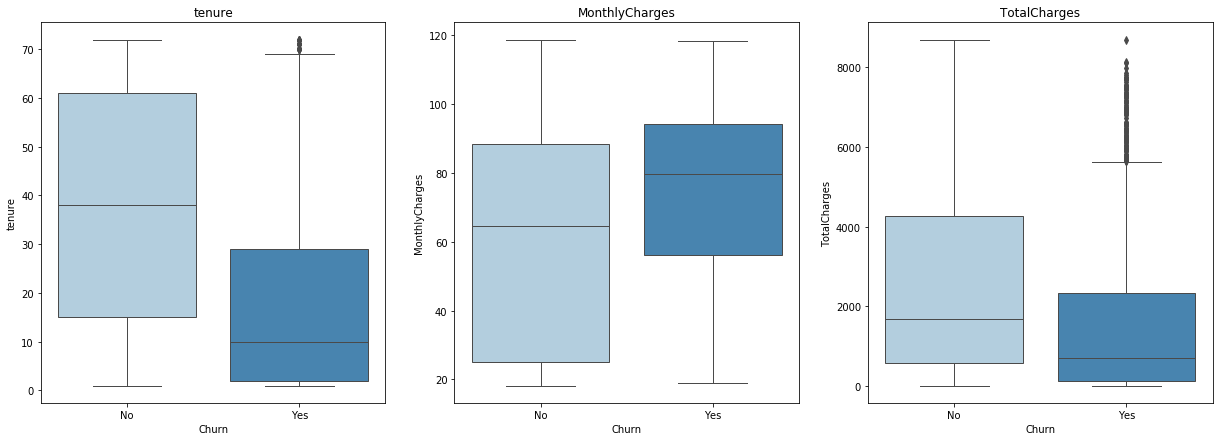

In [22]:
# Generating boxplots for all the numerical features vs Target variable i.e
# Generating boxplots for tenure, MonthlyCharges, TotalCharges vs Churn

boxplot ( 'Churn' , ['tenure', 'MonthlyCharges', 'TotalCharges'], tc_churn)

#### Insights:
#### > Churning customers have much lower tenure with a median of  10 months compared to a median of non-churners of 38 months.
#### > Churning customers have higher monthly charges with a median of 80 USD and much lower interquartile range compared to that of non-churners (median of 65 USD).
##### > TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

#### Target variable (Churn) Vs Categorical features:

In [23]:
# Create function to generate Count Plot


def countplot (x,y,tc_churn):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure (figsize = (7*columns,7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data= tc_churn, palette = 'Blues', alpha=0.8 ,linewidth=1, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

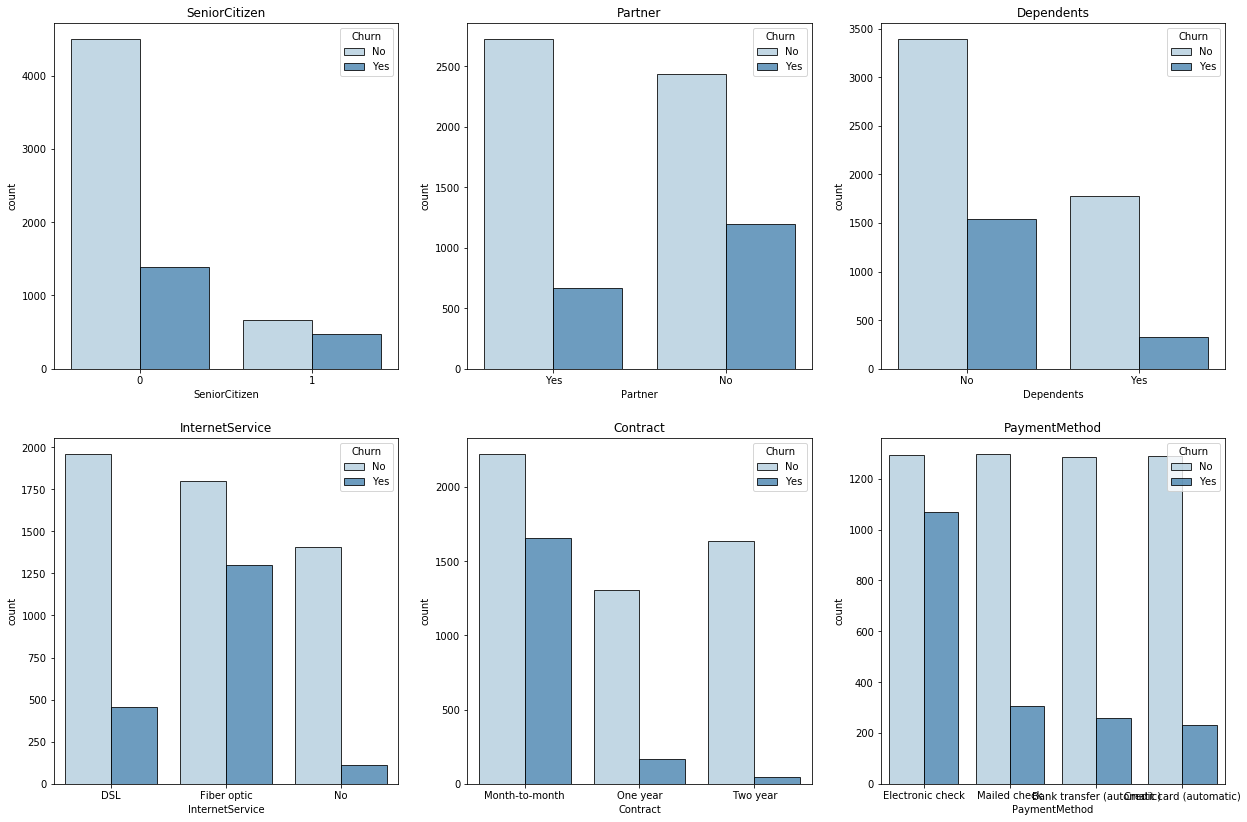

In [24]:
# Generating countplot for other features.

countplot ( 'Churn' , ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod'], tc_churn)

#### Insights:
#### Senior citizens churn rate is much higher than non-senior churn rate.
#### Churn rate for month-to-month contracts much higher that for other contract durations.
#### Moderately higher churn rate for customers without partners.
#### Much higher churn rate for customers without children.
#### Payment method electronic check shows much higher churn rate than other payment methods.
#### Customers with InternetService fiber optic as part of their contract have much higher churn rate.

### Multivariate Analysis:

In [25]:
tc_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

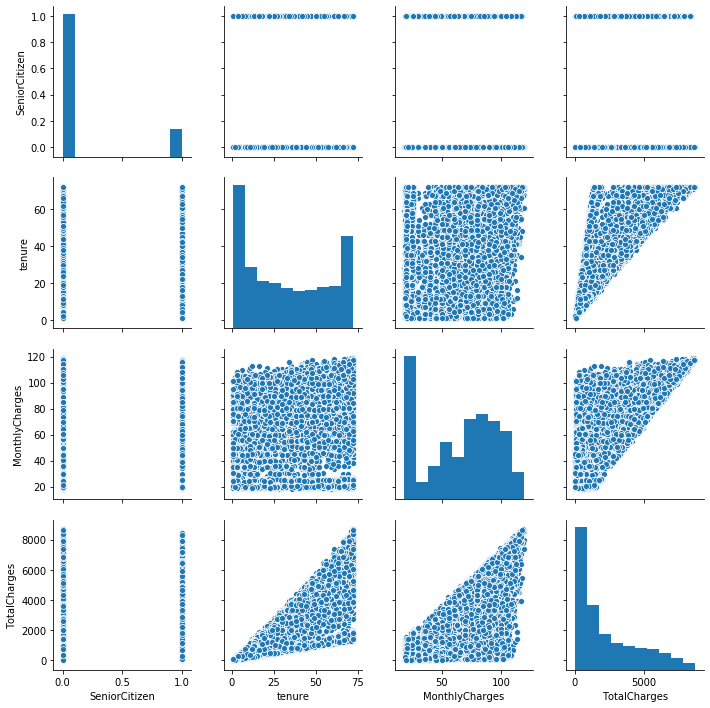

In [26]:
sns.pairplot(tc_churn)
plt.show()

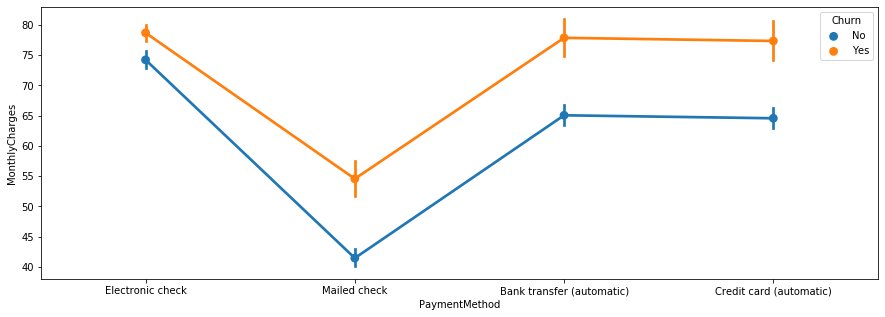

In [27]:
plt.figure(figsize=(15,5))
sns.pointplot(x="PaymentMethod", y="MonthlyCharges", hue = 'Churn',  data=tc_churn)
plt.show()

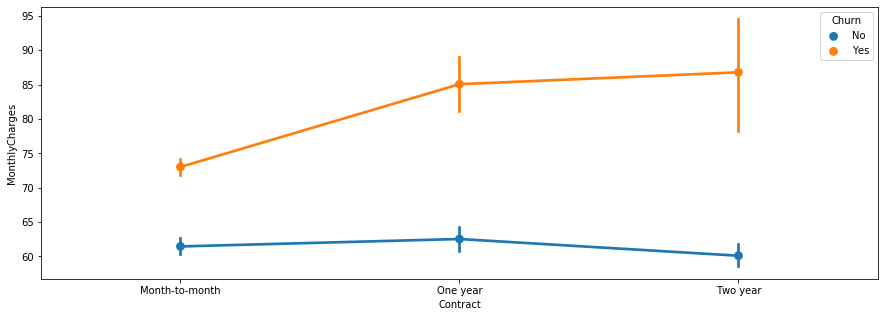

In [28]:
plt.figure(figsize=(15,5))
sns.pointplot(x="Contract", y="MonthlyCharges", hue = 'Churn',  data=tc_churn)
plt.show()

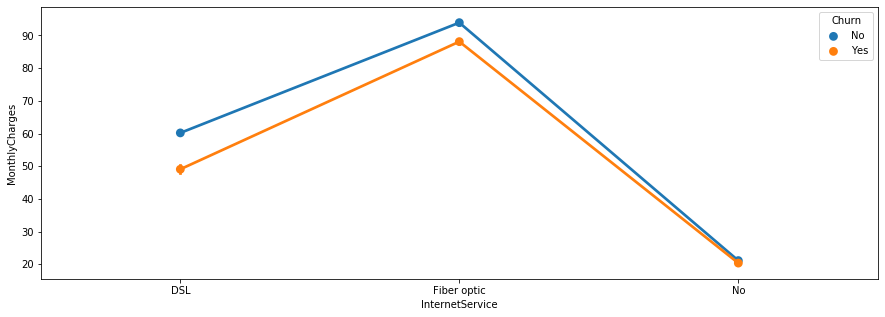

In [29]:
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetService", y="MonthlyCharges", hue = 'Churn',  data=tc_churn)
plt.show()


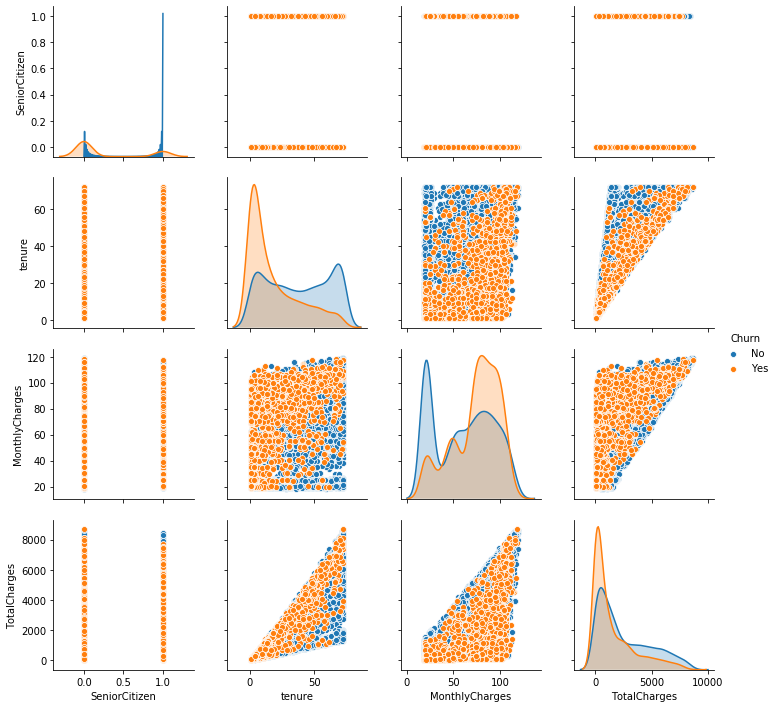

In [30]:
sns.pairplot(tc_churn,hue='Churn')

#### Correlation Matrix of all independent variables: 

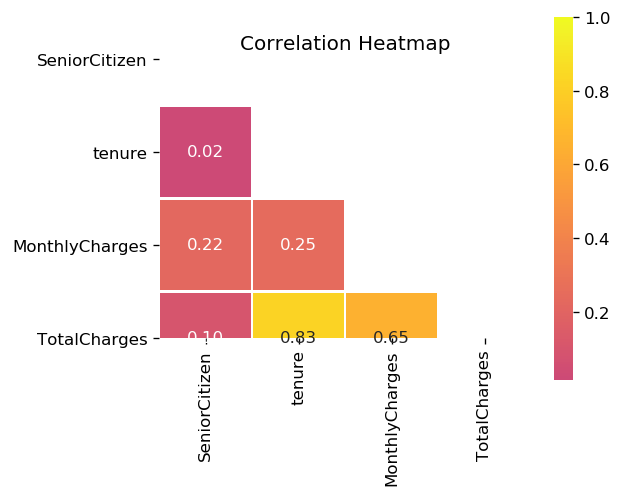

In [31]:
#Correlation matrix helps us to discover the bivariate relationship between independent variables in a dataset.


plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(tc_churn.corr()))
sns.heatmap(tc_churn.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma',vmax=1, center=0,square=True, linewidths=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

#### Insight: Tenure and TotalCharges has the highest Correlation whereas Tenure and SeniorCitizen has the least Correlation.

### Data Preprocessing:

#### Label Encoding:

#### Separating categorical and numerical columns

In [32]:
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = tc_churn.nunique()[tc_churn.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in tc_churn.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = tc_churn.nunique()[tc_churn.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#### Label Encoding Binary Columns

In [33]:
le = LabelEncoder()
for i in bin_cols :
    tc_churn[i] = le.fit_transform(tc_churn[i])

#### One Hot Encoding:

In [34]:
# Remove Identifiers: Separate ‘customerID’ from training and test data frames.
    
identity = tc_churn["customerID"]
tc_churn = tc_churn.drop(columns="customerID")


#tc_churn.drop(['customerID'],axis=1,inplace=True)

In [35]:
#Convert rest of categorical variable into dummy:
tc_churn= pd.get_dummies(tc_churn)
#Rejoin userid to dataset:
#tc_churn = pd.concat([tc_churn, identity], axis = 1)

In [36]:
tc_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

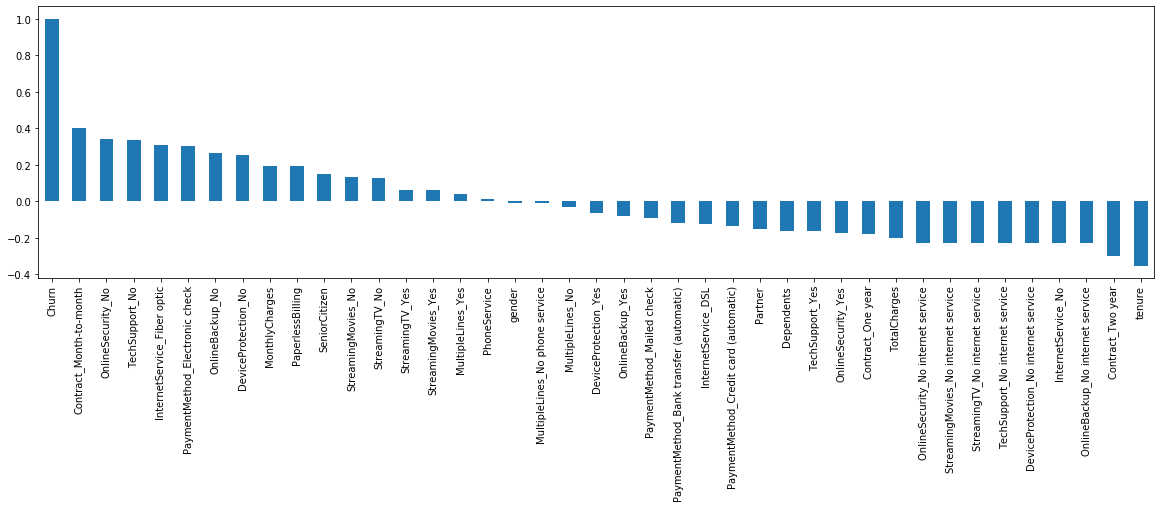

In [37]:
# Correlation plot for correlation of churn with each of remaining features:

plt.figure(figsize=(16,10))
tc_churn.corr()["Churn"].sort_values(ascending = False).plot(kind='bar',figsize=(20,5))

####  Split the dataset into dependent and independent variables:

In [38]:
#Identify response variable:
    
response = tc_churn["Churn"]
tc_churn = tc_churn.drop(columns="Churn")

In [39]:
# Let’s decouple the master dataset into training and test set with an 80%-20% ratio.

X_train, X_test, y_train, y_test = train_test_split(tc_churn, response,stratify=response, test_size = 0.2)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5625, 40)
Number transactions y_train dataset:  (5625,)
Number transactions X_test dataset:  (1407, 40)
Number transactions y_test dataset:  (1407,)


#### Conduct Feature Scaling:

It’s important to normalize the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1.

In [40]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Selection:

In [59]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(  
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.59,1.62,74.97,1.43
1,SVC,83.56,1.61,80.21,1.13
6,Random Forest,82.10,1.75,78.28,1.36
4,Gaussian NB,81.91,1.76,68.89,2.65
2,Kernel SVM,79.46,1.41,79.40,1.18
3,KNN,77.15,2.33,75.57,2.06
5,Decision Tree Classifier,65.76,1.22,73.01,1.38


In [60]:
models

[('Logistic Regression',
  LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='linear', max_iter=-1, probability=False, random_state=0,
      shrinking=True, tol=0.001, verbose=False)),
 ('Kernel SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=0,
      shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       m

#### Visualize Classification Algorithms Accuracy Comparisons:

#### Using Accuracy Mean:

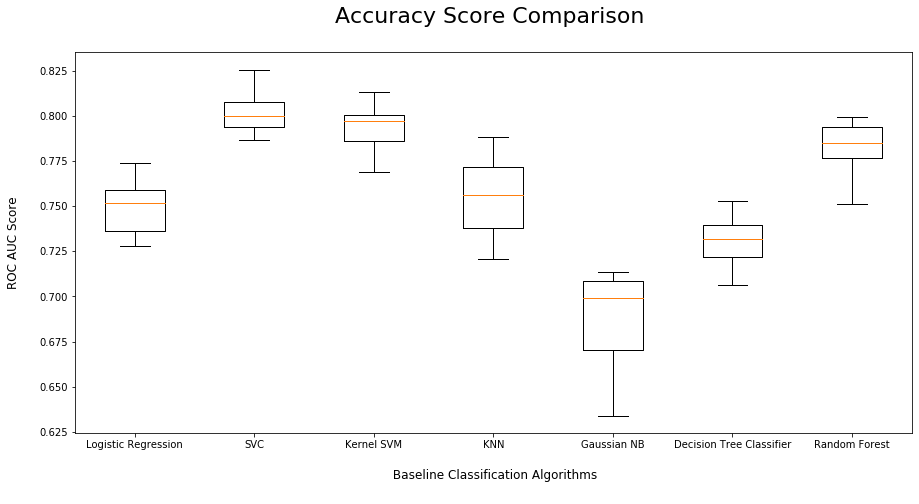

In [61]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
#plt.legend

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### Using Area under ROC Curve:

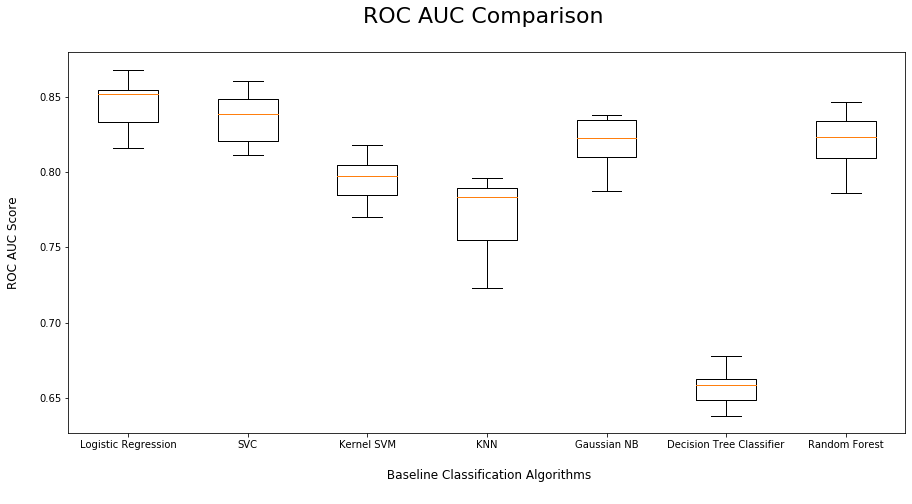

In [62]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Get the right parameters for the baseline models: 
#### Before doing the second iteration, let’s optimize the parameters and finalize the evaluation metrics for model selection.

#### Identify the optimal number of K neighbors for KNN Model: 

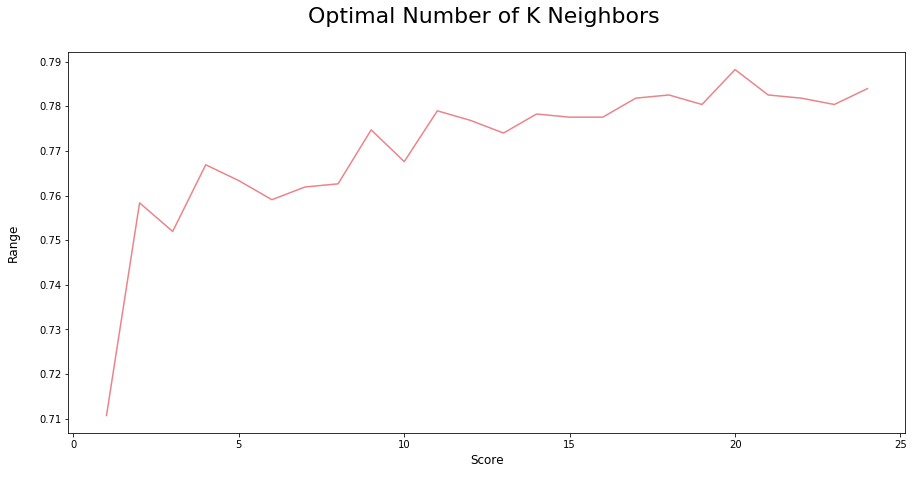

In [64]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### Imsight: As we can see from the above iterations, if we use K = 20, then we will get the maximum score 

#### Identify the optimal number of trees for Random Forest Model: 

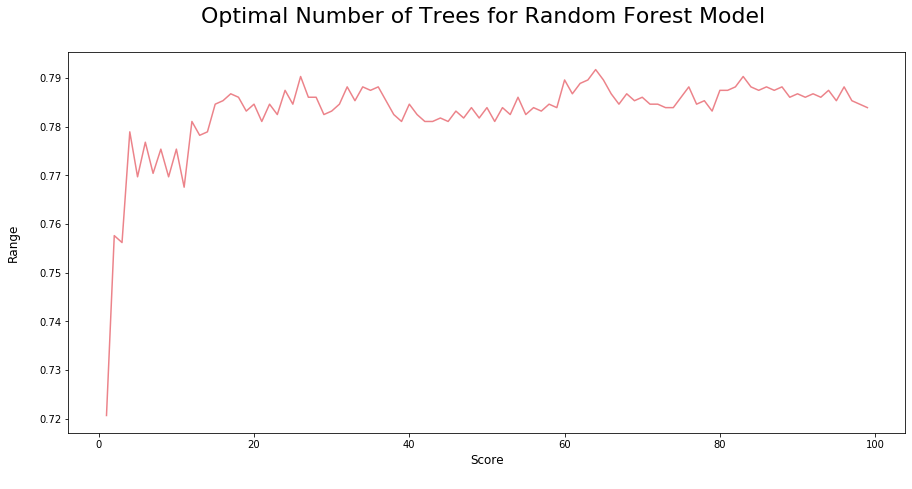

In [65]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

#### Insight: As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 65.

### Compare Baseline Classification Algorithms (2nd Iteration):

In [66]:
#we would be using the optimised parameters for KNN and Random Forest models.
#Also, we know that false negatives are more costly than false positives in a churn 
#and hence let’s use precision, recall and F2 scores as the ideal metric for the model selection.

#### Logistic Regression:

In [73]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552


#### Support Vector Machine (linear classifier):

In [74]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552
1         SVM (Linear)  0.798152   0.646104  0.532086  0.583578  0.551552


#### Kernel SVM:

-**# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
-**# Predicting the Test set results 
y_pred = classifier.predict(X_test)
-**#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)**

#### K-Nearest Neighbors:

In [75]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 20, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552
1          SVM (Linear)  0.798152   0.646104  0.532086  0.583578  0.551552
2  K-Nearest Neighbours  0.788202   0.614458  0.545455  0.577904  0.557987


#### Naive Bayes:

In [76]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552
1          SVM (Linear)  0.798152   0.646104  0.532086  0.583578  0.551552
2  K-Nearest Neighbours  0.788202   0.614458  0.545455  0.577904  0.557987
3            Naive Byes  0.700071   0.464602  0.842246  0.598859  0.724471


#### Decision Tree:

In [77]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552
1          SVM (Linear)  0.798152   0.646104  0.532086  0.583578  0.551552
2  K-Nearest Neighbours  0.788202   0.614458  0.545455  0.577904  0.557987
4         Decision Tree  0.716418   0.467700  0.483957  0.475690  0.480616
3            Naive Byes  0.700071   0.464602  0.842246  0.598859  0.724471


#### Random Forest:

In [78]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 65, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552
1          SVM (Linear)  0.798152   0.646104  0.532086  0.583578  0.551552
5         Random Forest  0.793177   0.638796  0.510695  0.567608  0.532033
2  K-Nearest Neighbours  0.788202   0.614458  0.545455  0.577904  0.557987
3         Decision Tree  0.716418   0.467700  0.483957  0.475690  0.480616
4            Naive Byes  0.700071   0.464602  0.842246  0.598859  0.724471


#### Insight: From the 2nd iteration, we can definitely conclude that "Logistic Regression" is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Logistic Regression and evaluate its performance in the forthcoming sections.

### Model Evaluation:

#### Train & evaluate Chosen Model:

In [82]:
classifier = LogisticRegression(random_state = 0,penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.798152   0.646104  0.532086  0.583578  0.551552


#### K- Fold Cross-Validation:

#### in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [83]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy:%0.2f (+/- %0.2f)"  % (accuracies.mean(),accuracies.std() * 2))

Logistic Regression Classifier Accuracy:0.80 (+/- 0.02)


#### Insight: Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 78% to 82% while running this model on any test set.

#### Visualize results on a Confusion Matrix:

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

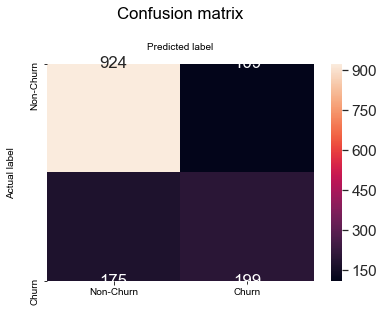

In [84]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Churn","Churn"]],
                  columns = [i for i in ["Non-Churn","Churn"]])
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
plt.title('Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

#### Evaluate the model using ROC Graph:

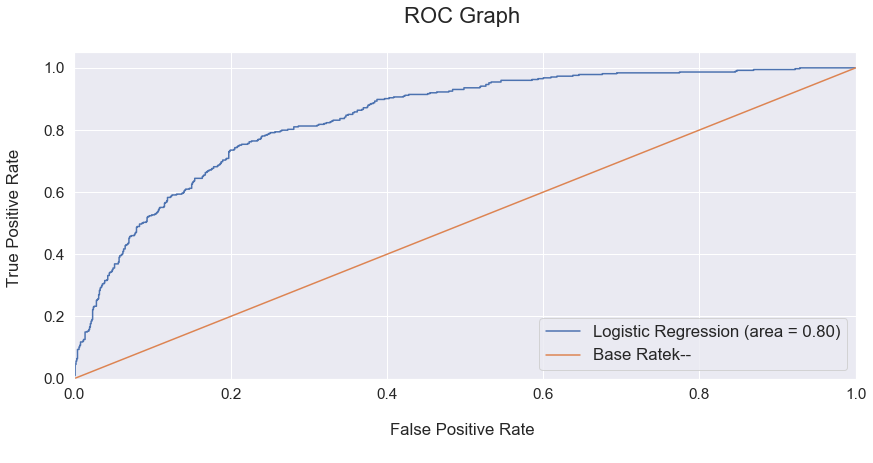

In [85]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Model Improvement:

#### Hyper parameter Tuning via Grid Search:

In [86]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 38.03 seconds


(0.7575612955674365, {'C': 0.001, 'penalty': 'l2'})

In [87]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 2.13 seconds


(0.7575612955674365, {'C': 0.001, 'penalty': 'l2'})

#### Final Hyperparameter tuning and selection:

In [88]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

#### Compare predictions against the test set:

[[924 109]
 [175 199]]
Test Data Accuracy: 0.7982


<Figure size 2016x1440 with 0 Axes>

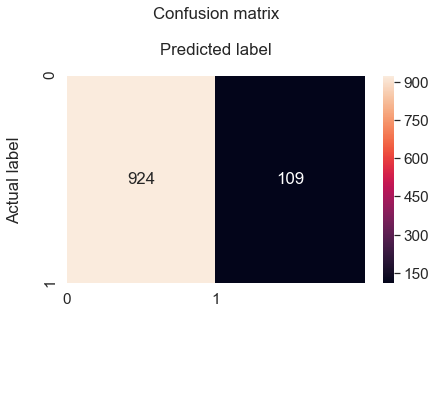

In [89]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm,  [i for i in ["Non-Churn","Churn"]],
                  columns = [i for i in ["Non-Churn","Churn"]])
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [90]:
# Save to file in the current working directory
pkl_filename = "pickle_logreg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr_classifier, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

### GUI:

In [ ]:
win=Tk()
win.geometry("400x600")
win.title("Diabetes Predictions")



Gender=Label(win,text="Gender:").grid(row=0,column=0)
Gender_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Gender_var).grid(row=0,column=1)


Senior_Citizen=Label(win,text="Senior Citizen:").grid(row=1,column=0)
Sen_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Sen_var).grid(row=1,column=1)


Partner=Label(win,text="Partner:").grid(row=2,column=0)
Partner_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Partner_var).grid(row=2,column=1)


Dep=Label(win,text="Dependents:").grid(row=3,column=0)
Dep_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Dep_var).grid(row=3,column=1)


Ten=Label(win,text="Tenure:").grid(row=4,column=0)
Ten_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Ten_var).grid(row=4,column=1)


Phone=Label(win,text="Phone Services:").grid(row=5,column=0)
Phone_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Phone_var).grid(row=5,column=1)


Mul=Label(win,text="Multiple Lines:").grid(row=6,column=0)
Mul_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Mul_var).grid(row=6,column=1)


Int=Label(win,text="Internet Service:").grid(row=7,column=0)
Int_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Int_var).grid(row=7,column=1)


Os=Label(win,text="Online Security:").grid(row=8,column=0)
Os_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Os_var).grid(row=8,column=1)


Ob=Label(win,text="Online Backup:").grid(row=9,column=0)
Ob_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Ob_var).grid(row=9,column=1)


Dev=Label(win,text="Device Protection:").grid(row=10,column=0)
Dev_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Dev_var).grid(row=10,column=1)


Ts=Label(win,text="Tech Support:").grid(row=11,column=0)
Ts_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Ts_var).grid(row=11,column=1)


St=Label(win,text="Streaming Tv:").grid(row=12,column=0)
St_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=St_var).grid(row=12,column=1)


Sm=Label(win,text="Streaming Movies:").grid(row=13,column=0)
Sm_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Sm_var).grid(row=13,column=1)


Cont=Label(win,text="Contract:").grid(row=14,column=0)
Cont_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Cont_var).grid(row=14,column=1)


Pb=Label(win,text="Paperless Billing:").grid(row=15,column=0)
Pb_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Pb_var).grid(row=15,column=1)


Pm=Label(win,text="Payment Method:").grid(row=16,column=0)
Pm_var=tk.StringVar()
entry_frame= Entry(win,width=30,textvariable=Pm_var).grid(row=16,column=1)


Monthly_charges=Label(win,text="Monthly Charges:").grid(row=17,column=0)
Mon_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Mon_var).grid(row=17,column=1)


Total_charges=Label(win,text="Total Charges:").grid(row=18,column=0)
Tot_var=tk.IntVar()
entry_frame= Entry(win,width=30,textvariable=Tot_var).grid(row=18,column=1)


def output():
    predicted=pickle_model.predict(DS)
    
    Predict_entrybox=ttk.Entry(win,width=16)
    Predict_entrybox.grid(row=21,column=1)
    
    if predicted==1:
        Predict_entrybox.insert(1,str('Yes'))
    elif predicted==0:
        Predict_entrybox.insert(1,str('No'))
    
    
def transform(DS):
    DS['InternetService_Fiber optic']=(DS['InternetService']=='Fiber optic')*1
    DS['InternetService_No']=(DS['InternetService']=='No')*1
    DS['OnlineSecurity_Yes']=(DS['OnlineSecurity']=='Yes')*1
    DS['Contract_One year']=(DS['Contract']=='One year')*1
    DS['Contract_Two year']=(DS['Contract']=='Two year')*1
    #dropping original column
    DS.drop('InternetService',axis=1,inplace=True)
    DS.drop('OnlineSecurity',axis=1,inplace=True)
    DS.drop('Contract',axis=1,inplace=True)
    
    col=['Partner', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'Contract_One year', 'Contract_Two year',
       'tenure', 'MonthlyCharges', 'TotalCharges']
    for i in DS.columns:
        if i not in col:
            DS.drop(i,axis=1,inplace=True)
    #print(DS.columns)
    #ordering the columns according to X_Test
    DS=DS[['Partner', 'InternetService_Fiber optic', 'InternetService_No',
           'OnlineSecurity_Yes', 'Contract_One year', 'Contract_Two year',
           'tenure', 'MonthlyCharges', 'TotalCharges']]


    
    
    #print(predicted)


DF = pd.DataFrame()


def action():
    global DS
    DB=pd.DataFrame()
    DF = pd.DataFrame(columns=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',
                           'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                               'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges',
                               'TotalCharges'])
    GENDER=Gender_var.get()
    DF.loc[0,'gender']=GENDER
    
    SEN=Sen_var.get()
    DF.loc[0,'SeniorCitizen']=SEN
    
    PARTNER=Partner_var.get()
    DF.loc[0,'Partner']=PARTNER
    
    DEP=Dep_var.get()
    DF.loc[0,'Dependents']=DEP
    
    TEN=Ten_var.get()
    DF.loc[0,'tenure']=TEN
    
    PHONE=Phone_var.get()
    DF.loc[0,'PhoneService']=PHONE
    
    MUL=Mul_var.get()
    DF.loc[0,'MultipleLines']=MUL
    
    INT=Int_var.get()
    DF.loc[0,'InternetService']=INT
    
    OS=Os_var.get()
    DF.loc[0,'OnlineSecurity']=OS
    
    OB=Ob_var.get()
    DF.loc[0,'OnlineBackup']=OB
    
    DEV=Dev_var.get()
    DF.loc[0,'DeviceProtection']=DEV
    
    TS=Ts_var.get()
    DF.loc[0,'TechSupport']=TS
    
    ST=St_var.get()
    DF.loc[0,'StreamingTV']=ST
    
    SM=Sm_var.get()
    DF.loc[0,'StreamingMovies']=SM
    
    CONT=Cont_var.get()
    DF.loc[0,'Contract']=CONT
    
    PB=Pb_var.get()
    DF.loc[0,'PaperlessBilling']=PB
    
    PM=Pm_var.get()
    DF.loc[0,'PaymentMethod']=PM
    
    MON=Mon_var.get()
    DF.loc[0,'MonthlyCharges']=MON
    
    TOT=Tot_var.get()
    DF.loc[0,'TotalCharges']=TOT
    
    DS=DF
 
    transform(DS)


    
submit_button=ttk.Button(win,text="Submit",command=action)
submit_button.grid(row=19,column=1)



predict_button=ttk.Button(win,text="Predict",command=output)
predict_button.grid(row=20,column=1)
    
win.mainloop()

### Conclusion and Future Predictions:


1. From the 2nd iteration, we can definitely conclude that "Logistic Regression" is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives.

2. Contract duration: Contract duration month-to-month is the second biggest driver of churn

3. Partners and children: Having children ranks as the fourth feature that drives not churning, but strength is relatively low

4. Tenure: High tenure ranks as the strongest factor for not churning and the strongest feature overall. This is also supported by the boxplot in the EDA step.